**Unit 4 Deliverable 1**
# Big Data Wrangling with Google nGrams (Steps 6 - 7)
**Author:** Raghad Ibrahim  
**Date:** April 30, 2024  

> ## Table of Contents:
>> [Import Libraries](#1)
>>
>> [Read Data from an S3 Bucket](#2)
>>
>> [Data Wrangling](#3)
>>
>> [Plot](#4)

<hr>

Before working on this notebook we have already authenticated using AWS security key and access id on our git bash command prompt.

Firstly, activated the conda cloud_lab.

Secondly, typed aws configure and authenticated by providing access key and secutity key which we gathered from the security credentials page of our AWS account.

### Import Libraries <a class="anchor" id="1"></a>

Let's import the `boto3` library and have chosen the cloud lab environment where we had already installed boto.

Boto3 makes it easy to integrate Python application, library, or script with AWS services including Amazon S3, Amazon EC2, Amazon DynamoDB, and more. In this notebook, we will be accessing the csv file that we saved in our amazon s3 bucket.


In [10]:
# importing necessary libraries

import boto3
import pandas as pd
import matplotlib.pyplot as plt

### Read Data from an S3 Bucket <a class="anchor" id="2"></a>

We will be starting with instantiating a boto client.

In [2]:
# Instantiate an S3 client
s3_client = boto3.client('s3')

# Check
s3_client

In [3]:
# Get the specified file from the specified bucket and assign it to a variable
s3_object = s3_client.get_object(Bucket='google-ngrams-del', Key='filtered_data.csv')

# Check
s3_object

{'ResponseMetadata': {'RequestId': '1ZPXYMZBEVEY8EPF',
  'HostId': 'WjNbLQ+y5SbnAzdJoa9JvE7s7JqQwyscQuI95agi+ZbtAw0NMsghP7OAU2aSvXV2x6nUefVo7KU=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'WjNbLQ+y5SbnAzdJoa9JvE7s7JqQwyscQuI95agi+ZbtAw0NMsghP7OAU2aSvXV2x6nUefVo7KU=',
   'x-amz-request-id': '1ZPXYMZBEVEY8EPF',
   'date': 'Tue, 30 Apr 2024 17:56:05 GMT',
   'last-modified': 'Tue, 30 Apr 2024 12:00:18 GMT',
   'etag': '"fb3cf3d45b1fc32b939cbd13697dbe68"',
   'x-amz-server-side-encryption': 'AES256',
   'accept-ranges': 'bytes',
   'content-type': 'text/csv',
   'server': 'AmazonS3',
   'content-length': '7338'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2024, 4, 30, 12, 0, 18, tzinfo=tzutc()),
 'ContentLength': 7338,
 'ETag': '"fb3cf3d45b1fc32b939cbd13697dbe68"',
 'ContentType': 'text/csv',
 'ServerSideEncryption': 'AES256',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x15e3241f0>}

In [4]:
type(s3_object['Body'])

botocore.response.StreamingBody

Now let's load the data into pandas and display the `DataFrame`.

In [5]:
# Read the csv into a dataframe

df = pd.read_csv(s3_object['Body'] , header = 1) # pass the 'StreamingBody' 

df # Display

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1
...,...,...,...,...,...
311,data,2004,201841,93539,3483
312,data,2005,197467,88901,3392
313,data,2006,203669,92960,3449
314,data,2007,168338,78986,3246


In [8]:
# describe `year` and `frequency` columns

df.describe()

,year,frequency,pages,books
count,316.000000,316.000000,316.000000,316.000000
mean,1847.569620,38555.993671,21711.041139,1493.110759
std,96.874382,69212.366418,34901.797740,1560.040802
min,1584.000000,1.000000,1.000000,1.000000
25%,1771.750000,20.750000,19.000000,11.750000
50%,1850.500000,3004.000000,2729.500000,868.000000
75%,1929.250000,41776.750000,30195.750000,2964.250000
max,2008.000000,254561.000000,122472.000000,4372.000000


The `DataFrame` consists of $316$ rows and $5$ columns which are the following:

> `token`: keyword   
> `year`  : year book was published  
> `frequency`: frequency of the token seen in the books   
> `pages`: the number of pages where the token was detected   
> `books`: the number of books where the token was detected 

### Data Wrangling <a class="anchor" id="3"></a>

Let's start off by checking some information about the `DataFrame`.

In [6]:
# dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      316 non-null    object
 1   year       316 non-null    int64 
 2   frequency  316 non-null    int64 
 3   pages      316 non-null    int64 
 4   books      316 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.5+ KB


We see that four of our columns are of data type `int64` and one is an `object`. Before proceeding let's convert the `year` and `frequency` columns into `int32` so we can make the plot next.

In [7]:
# convert to correct type

df['year']= df['year'].astype('int32')
df['frequency']= df['frequency'].astype('int32')

### Plot <a class="anchor" id="4"></a>

Now we will plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib:


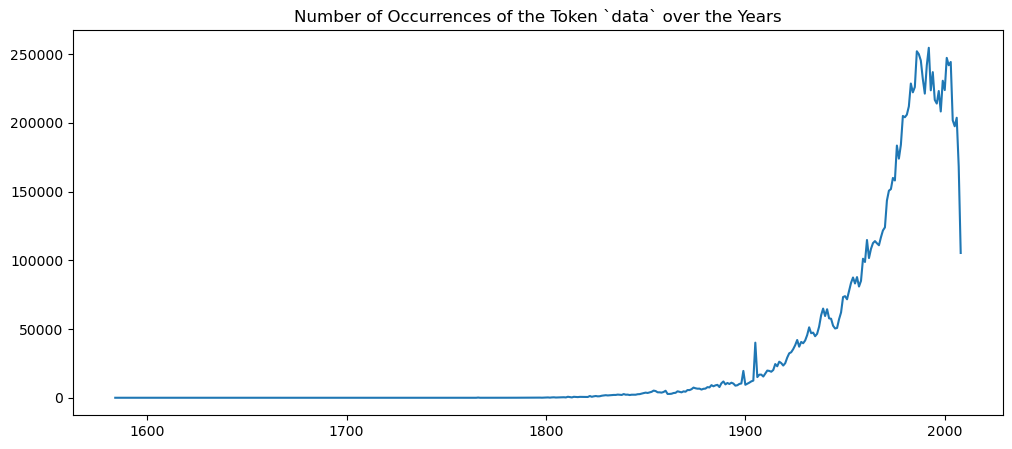

In [9]:
# plot the number of occurrences of the token data over the years

plt.figure(figsize=(12, 5)) # figure size
plt.plot(df['year'], df['frequency'] ) # x-axis = years  y-axis = frequency
plt.title("Number of Occurrences of the Token `data` over the Years") # set title 
plt.show() # display

We can see that the heavy use of the word "data" in books started in the mid 1800s and continued to rise exponentially until peaking some time around 1990-2000s although presumably due to the lack of updated data.

<hr>

Refer to the report for the next steps.